In [1]:
# import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# create a set of random latitude and longitude combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500).seed()
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500).seed()
lat_lngs = zip(lats, lngs)

AttributeError: 'numpy.ndarray' object has no attribute 'seed'

In [3]:
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)


In [7]:
# import datetime library and time library
import time
from datetime import datetime
import requests
import config

weather_api_key = config.weather_api_key
#print(weather_api_key)
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
#print(url)

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# loop through all ythe cities in the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jalu
Processing Record 2 of Set 1 | jacareacanga
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | lagoa
Processing Record 5 of Set 1 | haines junction
Processing Record 6 of Set 1 | iqaluit
Processing Record 7 of Set 1 | yantikovo
Processing Record 8 of Set 1 | methoni
Processing Record 9 of Set 1 | porto novo
Processing Record 10 of Set 1 | vincennes
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | camabatela
Processing Record 13 of Set 1 | ladario
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | high level
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | vestmannaeyjar
Processing Record 18 of Set 1 | kutum
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | reo
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | barrow
Processing Reco

Processing Record 35 of Set 4 | maceio
Processing Record 36 of Set 4 | buffalo
Processing Record 37 of Set 4 | linxia
Processing Record 38 of Set 4 | vilhena
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | samarai
Processing Record 42 of Set 4 | fort nelson
Processing Record 43 of Set 4 | basse-pointe
Processing Record 44 of Set 4 | kimberley
Processing Record 45 of Set 4 | kodiak
Processing Record 46 of Set 4 | nhulunbuy
Processing Record 47 of Set 4 | makat
Processing Record 48 of Set 4 | broome
Processing Record 49 of Set 4 | kashi
Processing Record 50 of Set 4 | valkeala
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | muros
Processing Record 4 of Set 5 | chulman
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | hasaki
Processing Record 7 of Set 5 | zhigalovo
Processing Record 8 of Set 5 | ahuimanu
Processing

Processing Record 28 of Set 8 | mazyr
Processing Record 29 of Set 8 | chiredzi
Processing Record 30 of Set 8 | altamont
Processing Record 31 of Set 8 | olafsvik
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | igdir
Processing Record 34 of Set 8 | hecun
Processing Record 35 of Set 8 | puerto leguizamo
Processing Record 36 of Set 8 | gambela
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | caravelas
Processing Record 39 of Set 8 | high rock
Processing Record 40 of Set 8 | storslett
Processing Record 41 of Set 8 | westport
Processing Record 42 of Set 8 | bac lieu
Processing Record 43 of Set 8 | naze
Processing Record 44 of Set 8 | kabanjahe
Processing Record 45 of Set 8 | caibarien
Processing Record 46 of Set 8 | pasighat
Processing Record 47 of Set 8 | bereda
Processing Record 48 of Set 8 | serra
Processing Record 49 of Set 8 | marathon
Processing Record 50 of Set 8 | imbituba
Processing Record 1 of Set 9 | antalaha
Processing Recor

Processing Record 19 of Set 12 | ifanadiana
Processing Record 20 of Set 12 | alexandria
Processing Record 21 of Set 12 | chipinge
Processing Record 22 of Set 12 | sao miguel do araguaia
Processing Record 23 of Set 12 | boende
Processing Record 24 of Set 12 | mizan teferi
Processing Record 25 of Set 12 | aguimes
Processing Record 26 of Set 12 | dukat
Processing Record 27 of Set 12 | belaya gora
Processing Record 28 of Set 12 | skibbereen
Processing Record 29 of Set 12 | camacha
Processing Record 30 of Set 12 | lexington
Processing Record 31 of Set 12 | dedza
Processing Record 32 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 33 of Set 12 | xiamen
Processing Record 34 of Set 12 | fakse
Processing Record 35 of Set 12 | aklavik
Processing Record 36 of Set 12 | novobirilyussy
Processing Record 37 of Set 12 | guerrero negro
Processing Record 38 of Set 12 | raga
Processing Record 39 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 40 of Set 12 | ostrovnoy

In [10]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jalu,29.0331,21.5482,13.97,40,100,1.13,LY,2021-12-22 19:08:42
1,Jacareacanga,-6.2222,-57.7528,33.00,49,100,1.26,BR,2021-12-22 19:08:42
2,Cape Town,-33.9258,18.4232,22.84,78,80,2.24,ZA,2021-12-22 19:06:10
3,Lagoa,39.0500,-27.9833,15.02,66,100,14.00,PT,2021-12-22 19:08:43
4,Haines Junction,60.7522,-137.5108,-28.22,97,50,1.01,CA,2021-12-22 19:08:43
5,Iqaluit,63.7506,-68.5145,-18.65,91,96,0.89,CA,2021-12-22 19:08:43
6,Yantikovo,55.8216,47.9104,-21.60,97,99,2.34,RU,2021-12-22 19:08:44
7,Methoni,36.8197,21.7049,12.34,64,63,2.57,GR,2021-12-22 19:08:44
8,Porto Novo,6.4965,2.6036,27.30,50,41,2.72,BJ,2021-12-22 19:05:37
9,Vincennes,48.8500,2.4333,0.31,87,90,0.89,FR,2021-12-22 19:08:45


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import time
import time

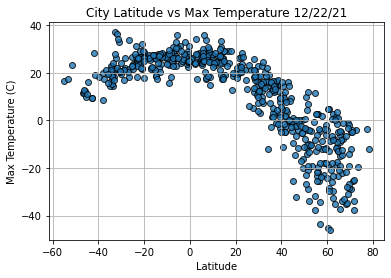

In [15]:
# 6.3.1 build scatter plot for lat vs max temp

plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

#add other properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

# show plot
plt.show()


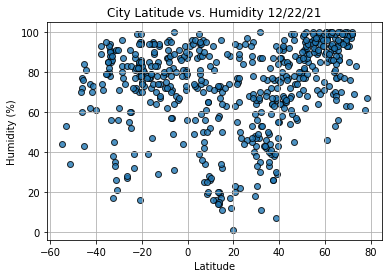

In [16]:
# 6.3.2 Latitude vs Humidity

# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

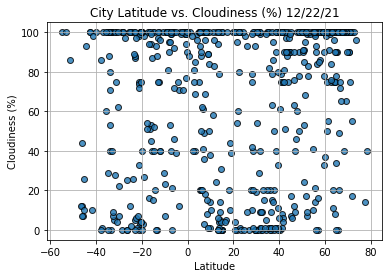

In [17]:
# 6.3.3 Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()